### Decision Tree
Using the same seattle weather data as last chapter develop a linear regression model

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/daniel-dc-cd/data_science/master/module_4_ML/data/seattle_weather_1948-2017.csv')

numrows = 25549


dt_df = pd.DataFrame({'today':[0.0]*numrows,
                 'tomorrow':[True]*numrows})

#sort columns for convience
seq = ['today',
       'tomorrow']

dt_df = dt_df.reindex(columns=seq)

for i in range(0 , numrows):
    tomorrow = df.iloc[i,1]
    today = df.iloc[(i-1),1]
    dt_df.iat[i,1] = tomorrow
    dt_df.iat[i,0] = today

dt_df = dt_df.dropna() #exclude any rows with missing data


In [2]:
dt_df.head()

,today,tomorrow
0,0.00,True
1,0.47,True
2,0.59,True
3,0.42,True
4,0.31,True


In [3]:
from sklearn import tree
x = dt_df.today.values
y = dt_df.tomorrow.values
x = x.reshape(dt_df.shape[0], 1)
#y = y.reshape(dt_df.shape[0], 1)

In [7]:
clf = tree.DecisionTreeClassifier(criterion='entropy').fit(x,y)

In [8]:
score = clf.score(x,y)
print(score)

0.7129883347686526


In [10]:
from sklearn import metrics
pred=clf.predict(x)
cm= metrics.confusion_matrix(y,pred)
print(cm)

[[11461  3183]
 [ 4149  6753]]


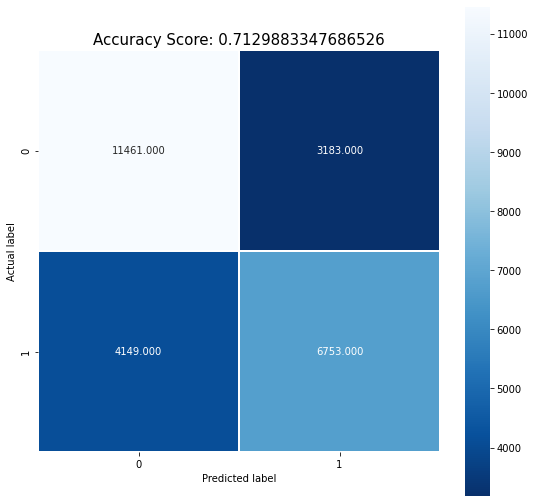

In [12]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square= True, cmap= 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title= 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size=15);

In [13]:
dotfile=open("dt.dot", 'w')
tree.export_graphviz(clf, out_file=dotfile)
dotfile.close()